In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path = "/Users/manshusharma/Downloads/Fraud.csv"

In [3]:
import pandas as pd
df = pd.read_csv(path)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [5]:
df.shape

(6362620, 11)

In [6]:
# Checking null values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
#Checking duplicate rows
df.duplicated().sum()

0

In [8]:
df.dtypes


step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [9]:
 #Getting number unique values for each column
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [10]:
#checking how many frauds are there

df['isFraud'].value_counts()


0    6354407
1       8213
Name: isFraud, dtype: int64

In [11]:
# Investigate variable "isFlaggedFraud"
pd.crosstab(df.isFraud,df.isFlaggedFraud)

isFlaggedFraud,0,1
isFraud,,
0,6354407,0
1,8197,16


In [12]:
 #Exploring transaction type

print(df.type.value_counts())


CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


In [13]:
# finding  out the types of fraudulent transaction types out of all the transaction modes.

print('The Types of fraudulent transactions are {}'.format(list(df.loc[df.isFraud == 1].type.drop_duplicates().values)) )


The Types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']


In [14]:

# figuring out the fraud transfer and fraud cash outs
dfFraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
dfFraudCashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]


#printing the number of fraudulent transfers ans cash outs
print ('The number of fraudulent TRANSFERs = {}'.format(len(dfFraudTransfer)))
print ('The number of fraudulent CASH_OUTs = {}'.format(len(dfFraudCashout)))

The number of fraudulent TRANSFERs = 4097
The number of fraudulent CASH_OUTs = 4116


In [15]:
# finding out the minimum and maximum transaction from Transfer and cash out transaction mode when it is set to be Fraud

print("Transfer Transaction")
print("Minimum Transaction :", df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')].amount.min())
print("Maximum Transaction :", df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')].amount.max())

print("\nCASH_OUT Transaction")
print("Minimum Transaction :", df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')].amount.min())
print("Maximum Transaction :", df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')].amount.max())

Transfer Transaction
Minimum Transaction : 63.8
Maximum Transaction : 10000000.0

CASH_OUT Transaction
Minimum Transaction : 0.0
Maximum Transaction : 10000000.0


In [16]:
# Filter for 'DEBIT' transactions and sum the amount
debit_amount_total = df[df['type'] == 'DEBIT']['amount'].sum()

# Print the result
print(f"Total amount for DEBIT transactions: {debit_amount_total:,.2f}")

Total amount for DEBIT transactions: 227,199,221.28


In [17]:
#finding out the transactions which are flagged to be fraud

print("The Type of Transaction in which IsFlagged is set :", df.loc[df.isFlaggedFraud == 1].type.drop_duplicates().values)



The Type of Transaction in which IsFlagged is set : ['TRANSFER']


In [18]:
# figuringing out the no. of flagged fraudulent transactions
FlaggedFraud = df.loc[(df.isFlaggedFraud == 1) & (df.type == 'TRANSFER')]
print("The no. of Flagged Fraudulent Transactions :", len(FlaggedFraud))

# printing the minimum and maximum transactions done when FlaggedFraud is set
# the Transaction mode being Transfer
print("Minimum Transaction :", df.loc[df.isFlaggedFraud == 1].amount.min())
print("Maximum Transaction :", df.loc[df.isFlaggedFraud == 1].amount.max())

The no. of Flagged Fraudulent Transactions : 16
Minimum Transaction : 353874.22
Maximum Transaction : 10000000.0


In [20]:
# Group by transaction type and sum the amount
transaction_amounts = df.groupby('type')['amount'].sum()

# Print the results in a readable format
print("Total amount for each transaction type:")
display(transaction_amounts.apply(lambda x: f'{x:,.2f}'))

Total amount for each transaction type:


type
CASH_IN     236,367,391,912.46
CASH_OUT    394,412,995,224.49
DEBIT           227,199,221.28
PAYMENT      28,093,371,138.37
TRANSFER    485,291,987,263.17
Name: amount, dtype: object

Total number of data point is 6362620 in which 8213 is fraud and 6354407 is not fraud data point.

Which means this is imbalanced datatset.

Fraud occurs only in 2 type of transactions: TRANSFER and CASH_OUT The number of fraudulent TRANSFERs = 4097

The number of fraudulent CASH_OUTs = 4116

The type of transactions in which isFlaggedFraud is set : TRANSFER

In [21]:
# Get the first 10 rows of the 'amount' column
print("First 10 rows of 'amount' column:")
display(df['amount'].head(10))

# Get the last 10 rows of the 'amount' column
print("\nLast 10 rows of 'amount' column:")
display(df['amount'].tail(10))

First 10 rows of 'amount' column:


0     9839.64
1     1864.28
2      181.00
3      181.00
4    11668.14
5     7817.71
6     7107.77
7     7861.64
8     4024.36
9     5337.77
Name: amount, dtype: float64


Last 10 rows of 'amount' column:


6362610      63416.99
6362611      63416.99
6362612    1258818.82
6362613    1258818.82
6362614     339682.13
6362615     339682.13
6362616    6311409.28
6362617    6311409.28
6362618     850002.52
6362619     850002.52
Name: amount, dtype: float64

Amount column spans a very wide range — from a few hundred to over 6 million (63 lakh+). This kind of highly skewed data makes a regular histogram misleading, because:

Most bins will be crowded at the lower end (0–10k),

Large values (like millions) will barely show up or distort the scale.

So, we use a Logarithmic X-axis
This gives us a clearer picture of the distribution across scales — from hundreds to lakhs to crores — by compressing the huge values and spreading out the small ones.

We can also figure out a distribution by reducing heavy tails. we’ll use standard histograms with KDE lines, but because the values still span a large range, we’ll clip extreme values (e.g., top 1%) to avoid the long tail distorting the plots.


Why Clip at 99th Percentile? It removes extreme values (like ₹60 lakh+) that would compress all the normal data into a few bins.

Keeps visualizations useful without switching to log scale.

In [22]:
# Cut off extreme outliers (e.g., 99th percentile)
upper_limit = df['amount'].quantile(0.99)

plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['amount'] <= upper_limit], x='amount', bins=30)
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.title('Amount Distribution (99th percentile)')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

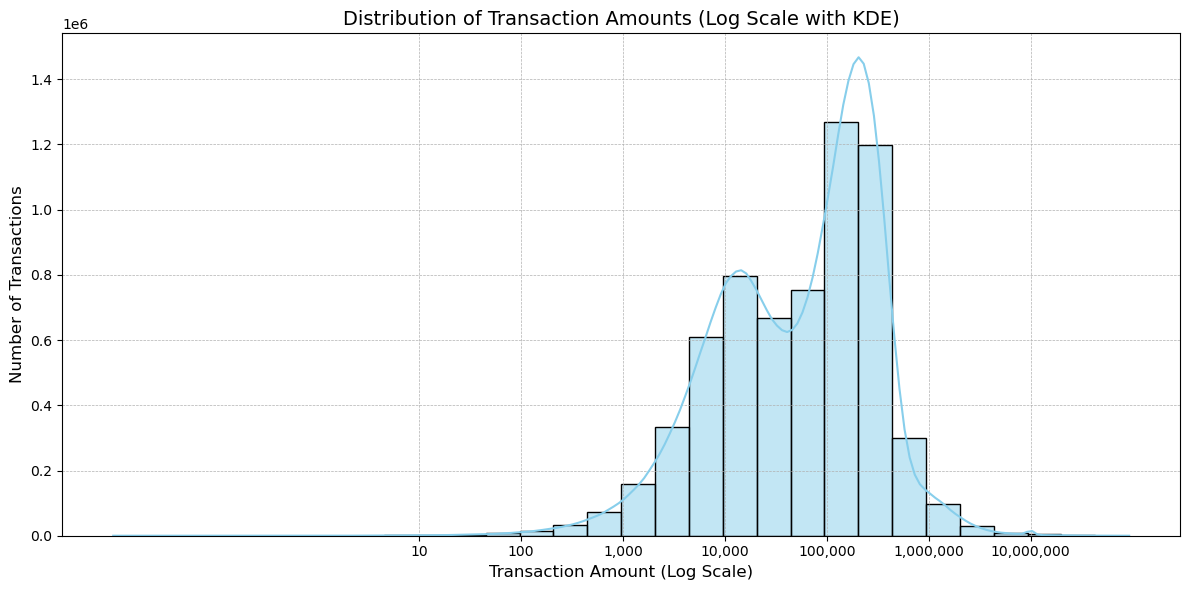

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Filter out non-positive amounts (log scale can't handle 0 or negatives)
df_nonzero = df[df['amount'] > 0]

# Compute log10 of the amounts
log_amounts = np.log10(df_nonzero['amount'])

# Plot histogram with KDE (density line)
plt.figure(figsize=(12, 6))
sns.histplot(log_amounts, bins=30, kde=True, color='skyblue', edgecolor='black')

# Label axes and title
plt.xlabel('Transaction Amount (Log Scale)', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.title('Distribution of Transaction Amounts (Log Scale with KDE)', fontsize=14)

# Custom tick labels in original amount units
ticks = [1, 2, 3, 4, 5, 6, 7]  # log10(10) to log10(10,000,000)
plt.xticks(ticks, [f"{10**i:,.0f}" for i in ticks])

plt.grid(True, ls='--', lw=0.5)
plt.tight_layout()
plt.show()


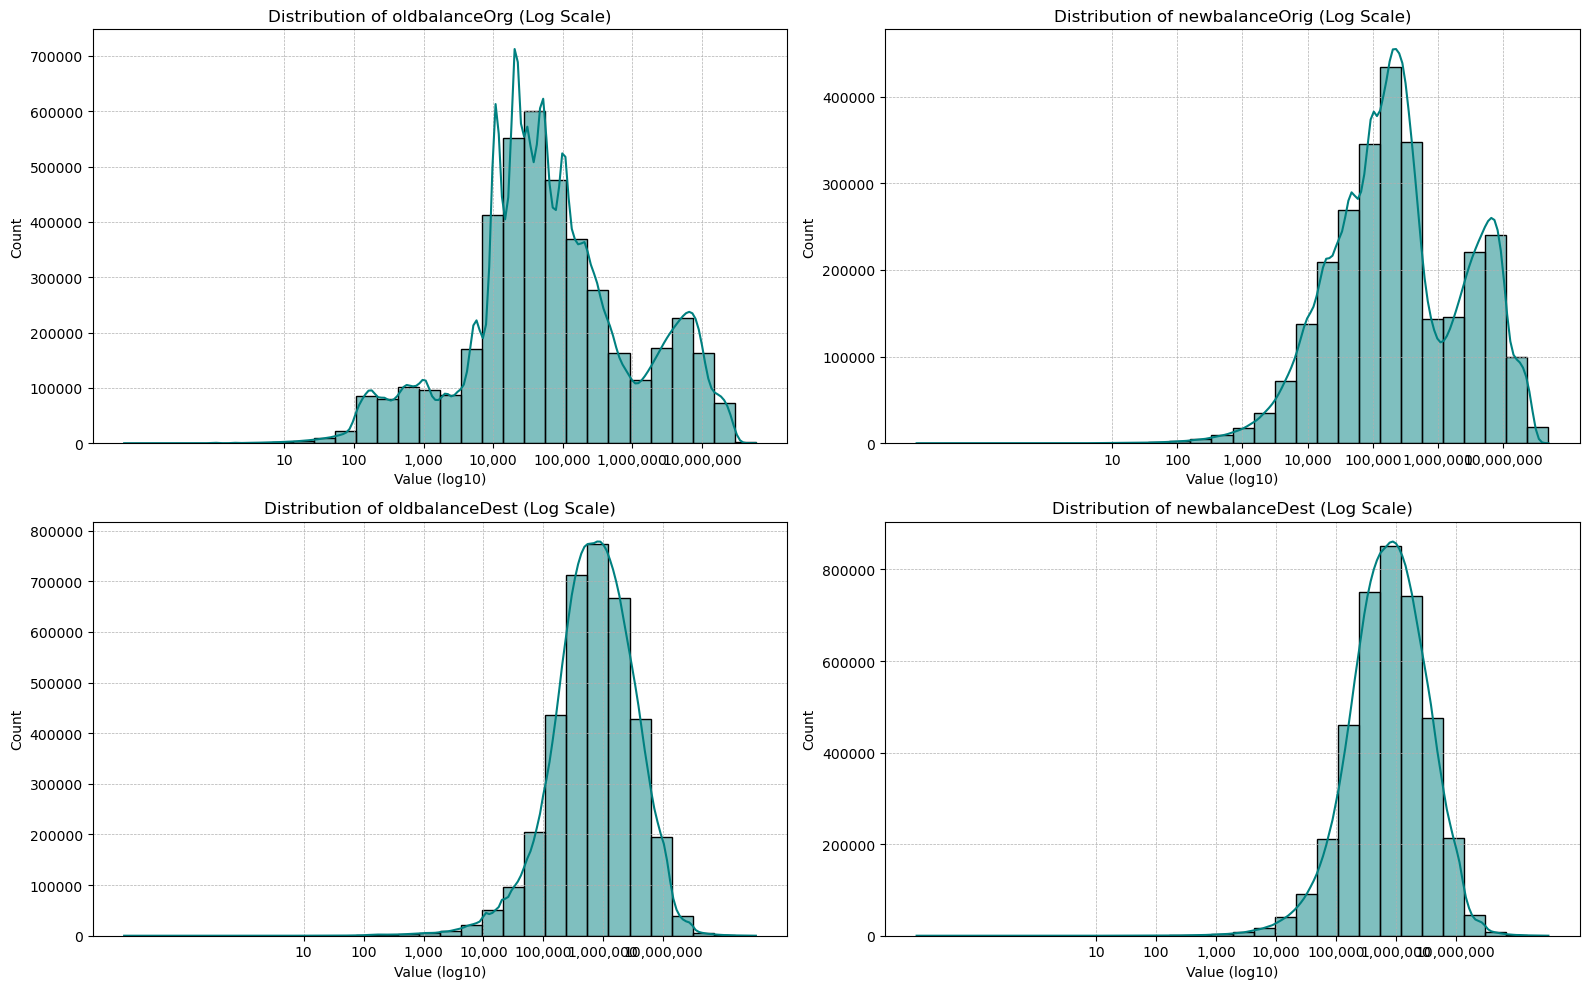

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# List of continuous columns
cols = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Set up subplots
plt.figure(figsize=(16, 10))

for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)

    # Remove non-positive values
    data = df[df[col] > 0][col]
    log_data = np.log10(data)

    sns.histplot(log_data, bins=30, kde=True, color='teal')
    plt.title(f'Distribution of {col} (Log Scale)')
    plt.xlabel('Value (log10)')

    # Custom ticks to show actual values
    ticks = [1, 2, 3, 4, 5, 6, 7]
    plt.xticks(ticks, [f"{10**t:,.0f}" for t in ticks])
    plt.grid(True, ls='--', lw=0.5)

plt.tight_layout()
plt.show()


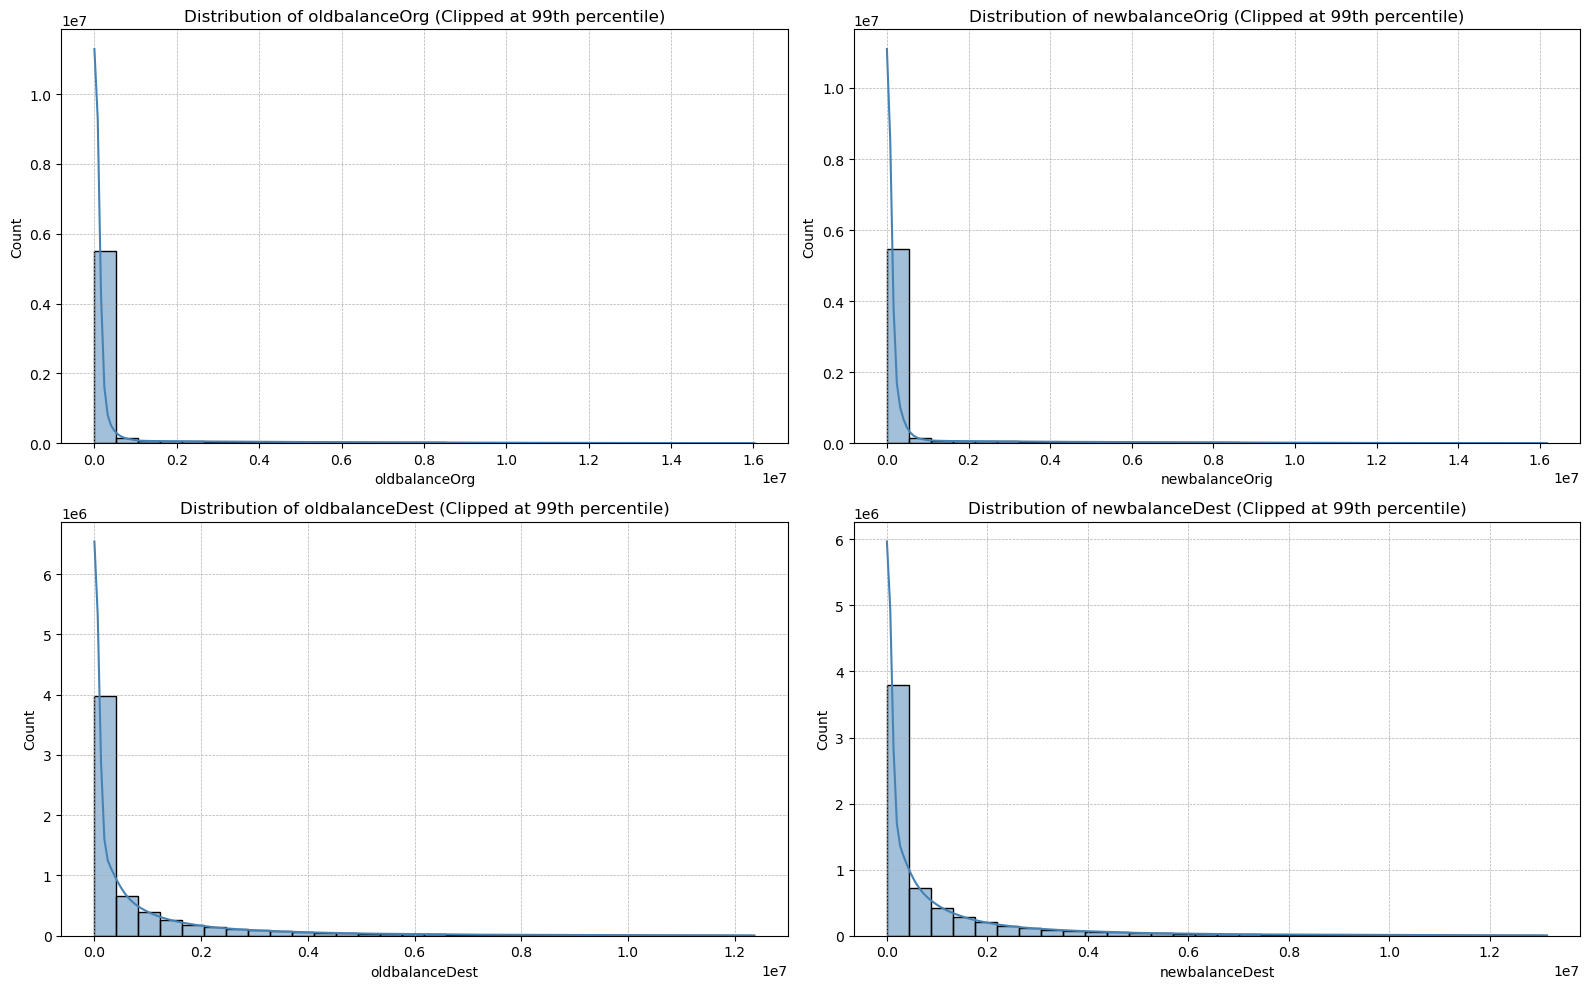

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Continuous columns to plot
cols = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

plt.figure(figsize=(16, 10))

for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)

    # Clip data at 99th percentile to reduce skew from outliers
    upper = df[col].quantile(0.99)
    clipped_data = df[df[col] <= upper][col]

    # Plot histogram with KDE
    sns.histplot(clipped_data, bins=30, kde=True, color='steelblue', edgecolor='black')
    plt.title(f'Distribution of {col} (Clipped at 99th percentile)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(True, linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


In [26]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Visualization in transaction types

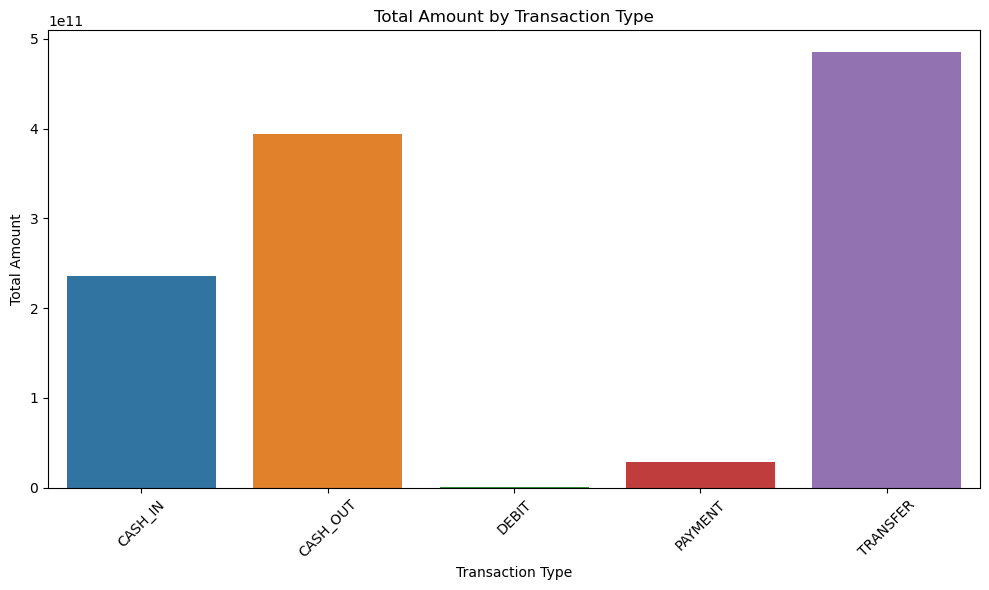

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=transaction_amounts.index, y=transaction_amounts.values)
plt.title('Total Amount by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

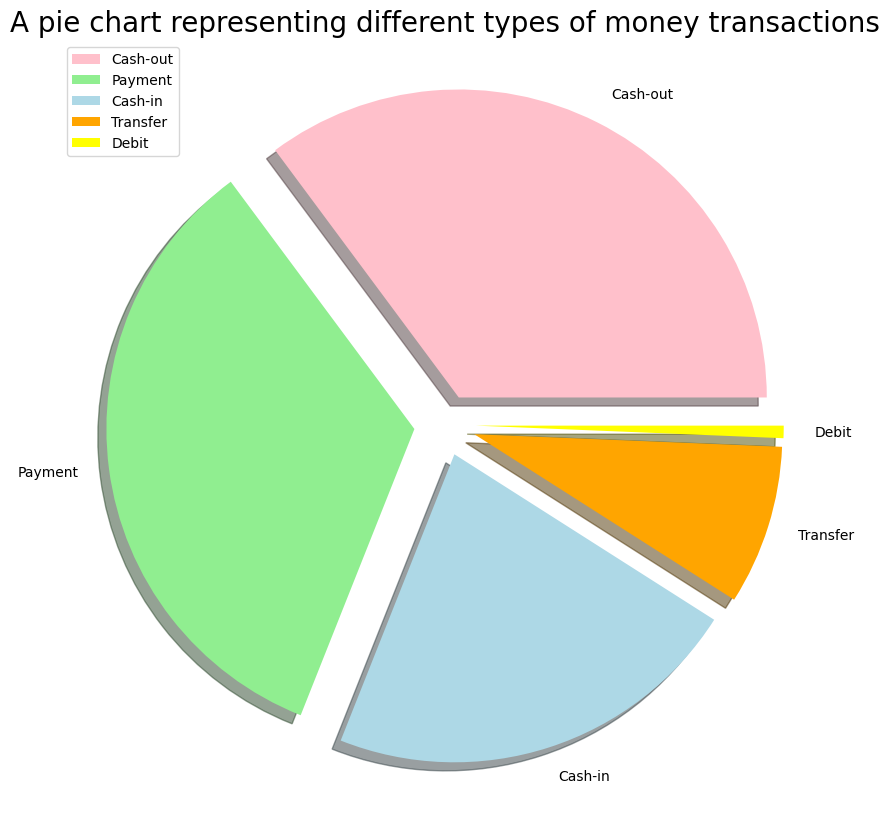

In [28]:
labels = ['Cash-out', 'Payment', 'Cash-in', 'Transfer', 'Debit']
size = [2237500, 2151495, 1399284, 532909, 41432]
colors = ['pink', 'lightgreen', 'lightblue', 'orange', 'yellow']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True)
plt.title('A pie chart representing different types of money transactions', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()



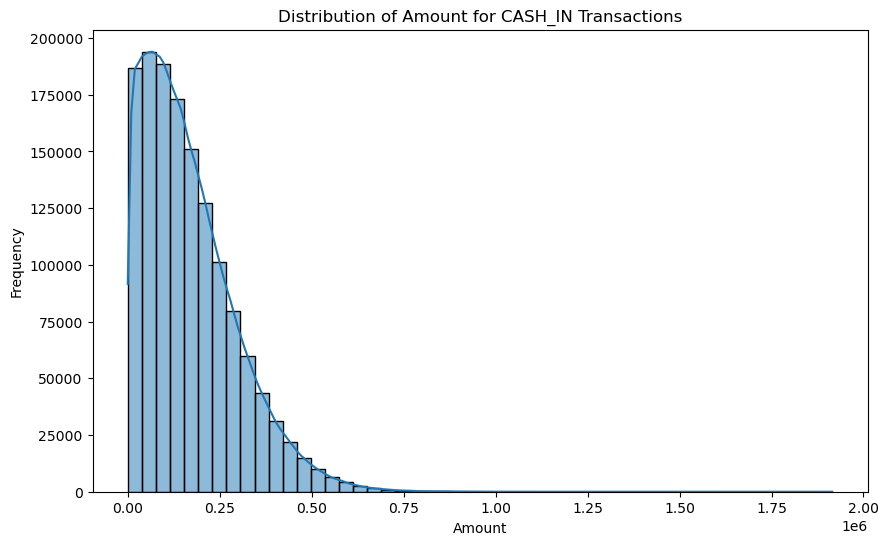

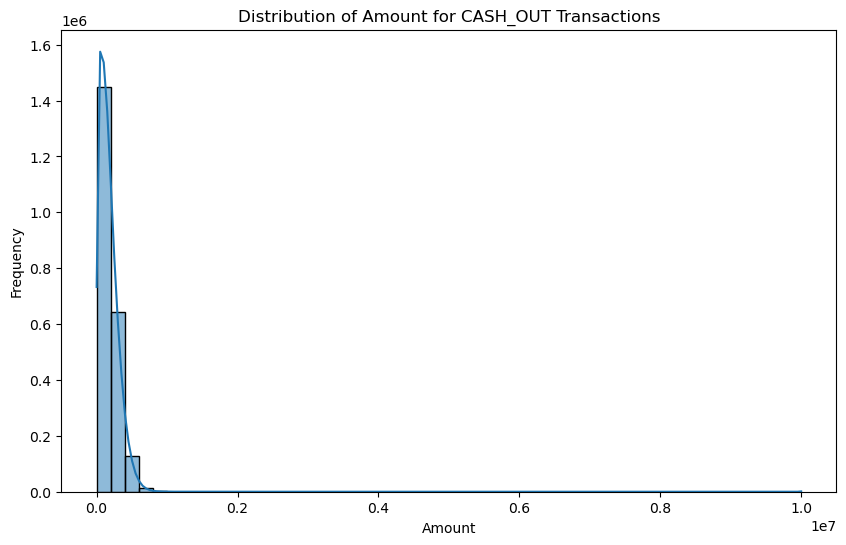

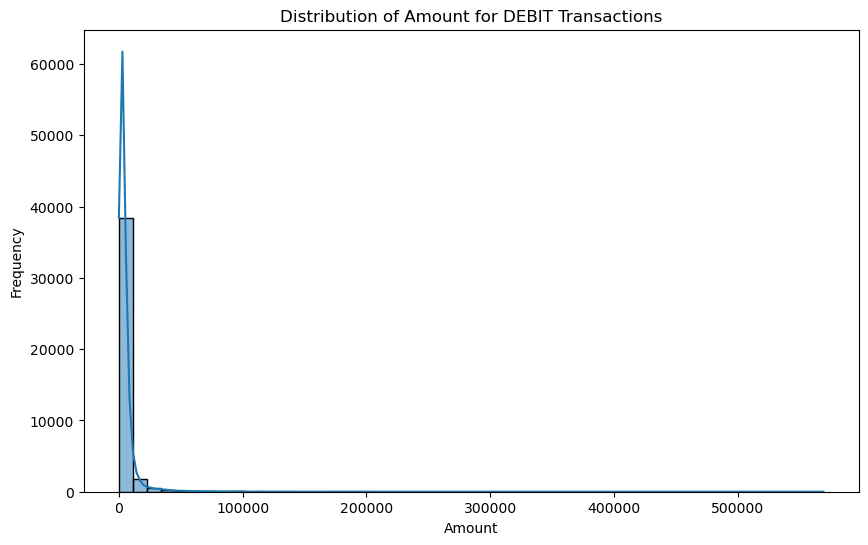

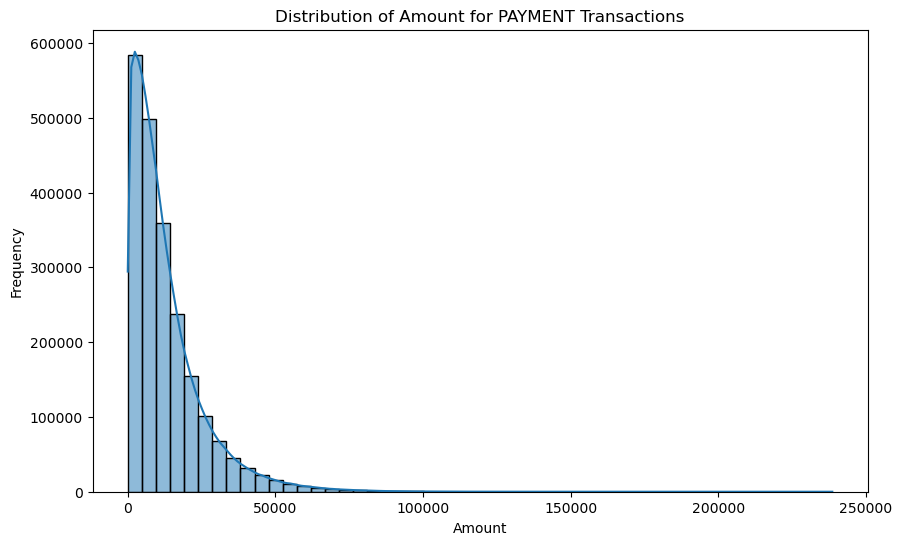

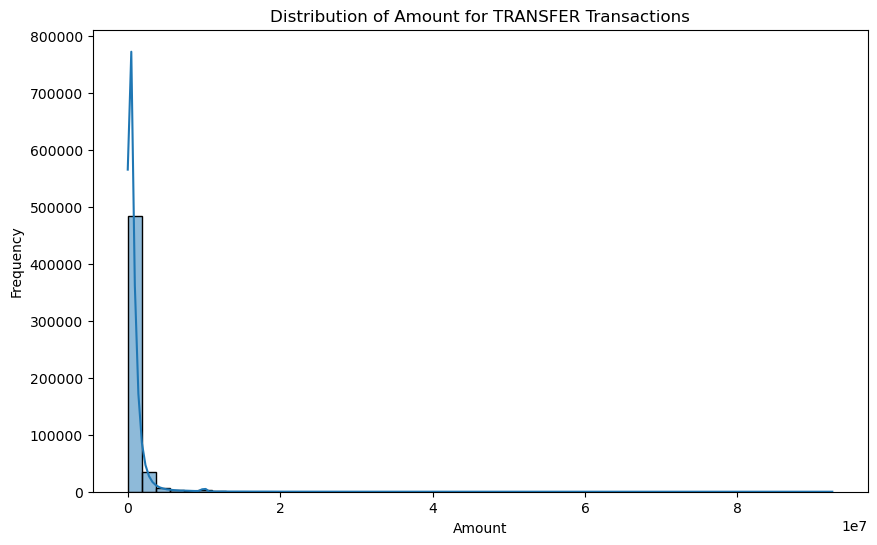

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

transaction_types = ['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']

for transaction_type in transaction_types:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[df['type'] == transaction_type]['amount'], bins=50, kde=True)
    plt.title(f'Distribution of Amount for {transaction_type} Transactions')
    plt.xlabel('Amount')
    plt.ylabel('Frequency')
    plt.show()

In [30]:
import matplotlib.ticker as ticker


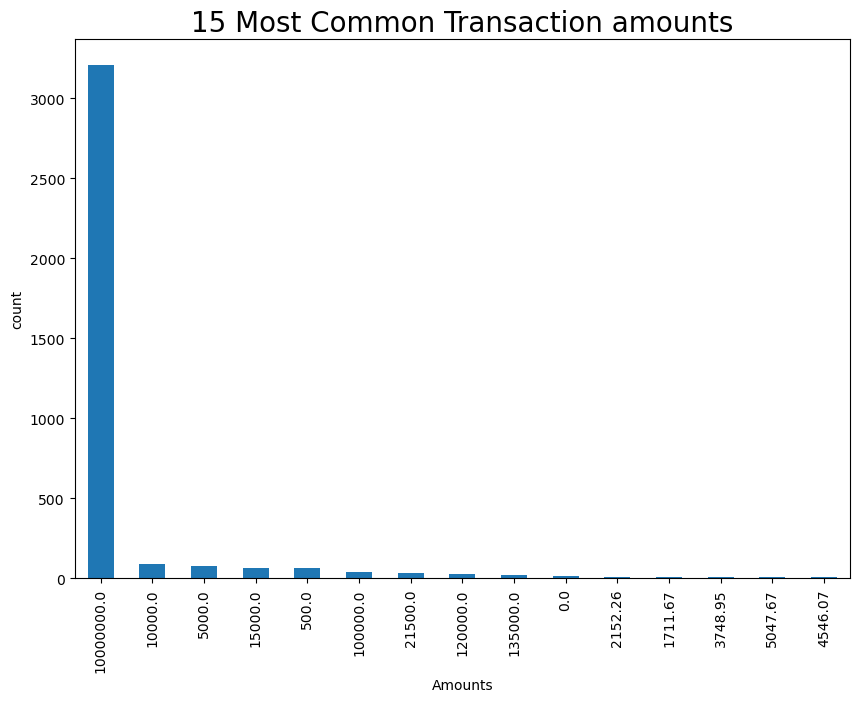

In [31]:
# checking the different values of amounts transationed

plt.rcParams['figure.figsize'] = (10, 7)

df['amount'].value_counts().head(15).plot.bar()
plt.title('15 Most Common Transaction amounts', fontsize = 20)
plt.xlabel('Amounts')
plt.ylabel('count')
plt.show()

0    6354407
1       8213
Name: isFraud, dtype: int64


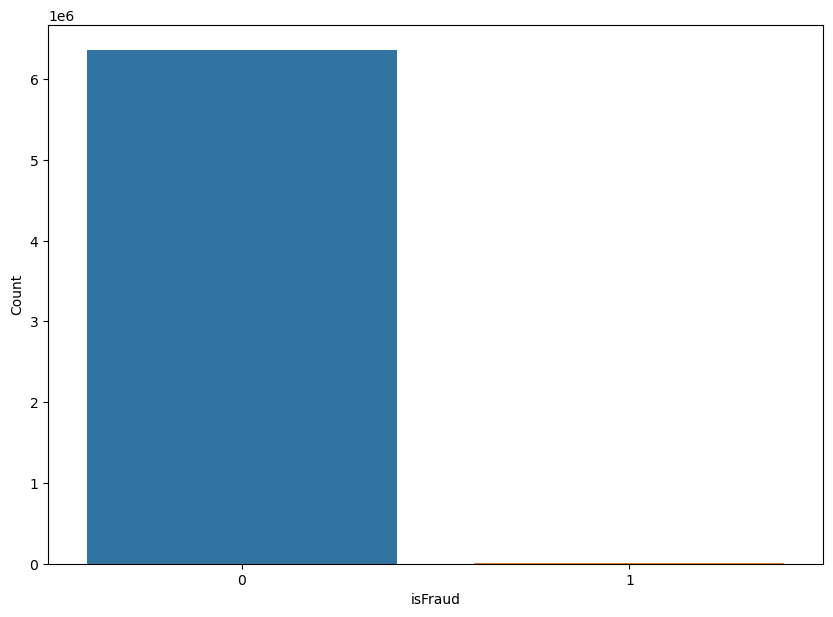

In [32]:
# count number of fraud and not fraud data
print(df.isFraud.value_counts())
sns.countplot(data=df, x='isFraud')
plt.ylabel('Count')
plt.show()

Since data is highly skewed for all the numerical columns we can use mad(mean absolute deviation) to figure out the outliers.

In [33]:
!pip install pyod


  Using cached pyod-2.0.5-py3-none-any.whl.metadata (46 kB)
  Using cached numba-0.60.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (2.7 kB)
  Using cached llvmlite-0.43.0-cp39-cp39-macosx_11_0_arm64.whl.metadata (4.8 kB)
  Using cached numpy-2.0.2-cp39-cp39-macosx_14_0_arm64.whl.metadata (60 kB)
  Using cached numpy-1.26.4-cp39-cp39-macosx_11_0_arm64.whl.metadata (61 kB)
Using cached pyod-2.0.5-py3-none-any.whl (200 kB)
Using cached numba-0.60.0-cp39-cp39-macosx_11_0_arm64.whl (2.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 3.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 3.9 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.2
    Can't uninstall 'numpy'. No files were found to uninstall.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [pyod]2/4 [numba]te]


with threshold 3.5

In [35]:
from pyod.models.mad import MAD
import pandas as pd

# Assuming your DataFrame is called df

# List of numerical columns
cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig']

# Initialize a dictionary to store the outlier information
outlier_info = {}

# Loop through each column to detect outliers
for col in cols:
    # Reshape the column into a 2D numpy array
    column_data = df[col].values.reshape(-1, 1)

    # Initialize MAD model with threshold set to 3.5
    mad_model = MAD(threshold=3.5)

    # Fit the model and get the outlier labels (1 for outliers, 0 for normal)
    mad_model.fit(column_data)
    labels = mad_model.labels_

    # Store outlier information (how many outliers)
    outlier_count = sum(labels)
    total_count = len(labels)
    outlier_percentage = (outlier_count / total_count) * 100

    # Save outlier stats for each column
    outlier_info[col] = {
        'outliers': outlier_count,
        'percent': round(outlier_percentage, 2)
    }

# Display outlier info for each column
for col, info in outlier_info.items():
    print(f"{col}: {info['outliers']} outliers ({info['percent']}%)")


/Users/manshusharma/miniconda3/envs/svastikkka/lib/python3.9/site-packages/pyod/models/mad.py:129: RuntimeWarning: divide by zero encountered in true_divide
  return np.nan_to_num(np.ravel(0.6745 * diff / self.median_diff_))
/Users/manshusharma/miniconda3/envs/svastikkka/lib/python3.9/site-packages/pyod/models/mad.py:129: RuntimeWarning: invalid value encountered in true_divide
  return np.nan_to_num(np.ravel(0.6745 * diff / self.median_diff_))
/Users/manshusharma/miniconda3/envs/svastikkka/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return reduction(axis=axis, out=out, **passkwargs)


amount: 457793 outliers (7.2%)
oldbalanceOrg: 1767508 outliers (27.78%)
newbalanceOrig: 2753054 outliers (43.27%)


with threshold 2.5

In [36]:
# List of numerical columns
cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig']

# Initialize a dictionary to store the outlier information
outlier_info = {}

# Loop through each column to detect outliers
for col in cols:
    # Reshape the column into a 2D numpy array
    column_data = df[col].values.reshape(-1, 1)

    # Initialize MAD model with threshold set to 3.5
    mad_model = MAD(threshold=2.5)

    # Fit the model and get the outlier labels (1 for outliers, 0 for normal)
    mad_model.fit(column_data)
    labels = mad_model.labels_

    # Store outlier information (how many outliers)
    outlier_count = sum(labels)
    total_count = len(labels)
    outlier_percentage = (outlier_count / total_count) * 100

    # Save outlier stats for each column
    outlier_info[col] = {
        'outliers': outlier_count,
        'percent': round(outlier_percentage, 2)
    }

# Display outlier info for each column
for col, info in outlier_info.items():
    print(f"{col}: {info['outliers']} outliers ({info['percent']}%)")


/Users/manshusharma/miniconda3/envs/svastikkka/lib/python3.9/site-packages/pyod/models/mad.py:129: RuntimeWarning: divide by zero encountered in true_divide
  return np.nan_to_num(np.ravel(0.6745 * diff / self.median_diff_))
/Users/manshusharma/miniconda3/envs/svastikkka/lib/python3.9/site-packages/pyod/models/mad.py:129: RuntimeWarning: invalid value encountered in true_divide
  return np.nan_to_num(np.ravel(0.6745 * diff / self.median_diff_))
/Users/manshusharma/miniconda3/envs/svastikkka/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return reduction(axis=axis, out=out, **passkwargs)


amount: 784458 outliers (12.33%)
oldbalanceOrg: 1926475 outliers (30.28%)
newbalanceOrig: 2753054 outliers (43.27%)


boxplot visualization

/Users/manshusharma/miniconda3/envs/svastikkka/lib/python3.9/site-packages/pyod/models/mad.py:129: RuntimeWarning: divide by zero encountered in true_divide
  return np.nan_to_num(np.ravel(0.6745 * diff / self.median_diff_))
/Users/manshusharma/miniconda3/envs/svastikkka/lib/python3.9/site-packages/pyod/models/mad.py:129: RuntimeWarning: invalid value encountered in true_divide
  return np.nan_to_num(np.ravel(0.6745 * diff / self.median_diff_))
/Users/manshusharma/miniconda3/envs/svastikkka/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return reduction(axis=axis, out=out, **passkwargs)


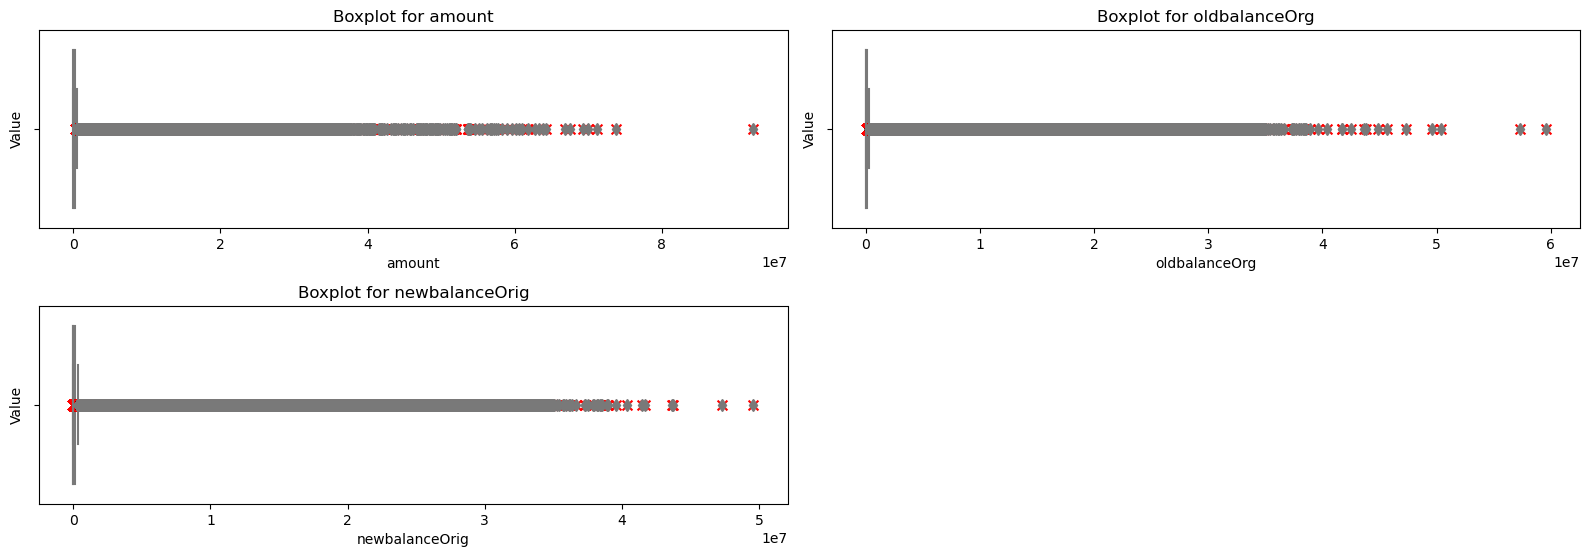

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from pyod.models.mad import MAD

# List of numerical columns
cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig']

# Set up a figure for the boxplots
plt.figure(figsize=(16, 8))

for i, col in enumerate(cols, 1):
    # Reshape the column into a 2D numpy array
    column_data = df[col].values.reshape(-1, 1)

    # Initialize MAD model with threshold set to 3.5
    mad_model = MAD(threshold=3.5)
    mad_model.fit(column_data)

    # Get the outlier labels (1 for outliers, 0 for normal)
    labels = mad_model.labels_

    # Add a new column to the dataframe to flag outliers
    df[f'{col}_outlier'] = labels

    # Plot boxplot
    plt.subplot(3, 2, i)
    sns.boxplot(x=df[col], color='lightblue', fliersize=6)

    # Highlight outliers using scatter plot
    outliers = df[df[f'{col}_outlier'] == 1]
    plt.scatter(outliers[col], [0] * len(outliers), color='red', label='Outliers', s=50, marker='x')

    # Title and labels
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.ylabel('Value')

plt.tight_layout()
plt.show()


From the given boxplots, some variables like amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, and newbalanceDest still have outliers. I haven’t removed them because those are unusual but valid transactions. In financial data, especially fraud detection, outliers are quite common and can be for potentially fraudulent or high-value transactions. Therefore, retaining these outliers will result in better model accuracy and insight.

Conclusion
1. No null value in data.
2. Outliner present in amount.
3. isFlaggedFraud is almost colliner with isFraud and not usefull in building model.

Multi-collinearity

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

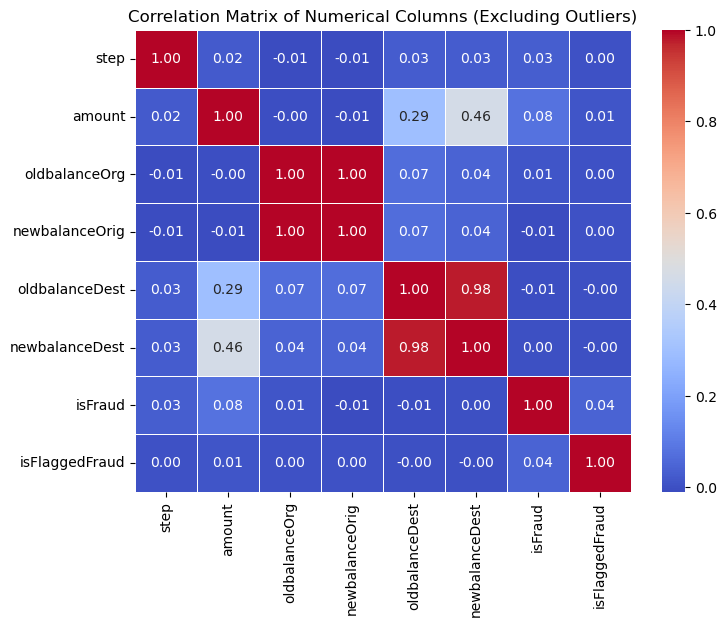

In [39]:
# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=['number'])

# Drop the outlier columns
outlier_cols_to_drop = [col for col in numerical_df.columns if '_outlier' in col]
numerical_df = numerical_df.drop(columns=outlier_cols_to_drop)

# Compute correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Columns (Excluding Outliers)')
plt.show()

VIF Collinearity

In [40]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np # Import numpy

def calc_VIF(df):
    # Select only numerical columns
    numerical_df = df.select_dtypes(include=[np.number]) # Use numpy.number

    # Remove the target variable if it's present
    if 'isFraud' in numerical_df.columns:
        X = numerical_df.drop(columns=['isFraud'])
    else:
        X = numerical_df.copy()

    # Drop columns related to outlier flagging if they exist
    outlier_cols_to_drop = [col for col in X.columns if '_outlier' in col]
    X = X.drop(columns=outlier_cols_to_drop, errors='ignore') # Use errors='ignore' to avoid errors if columns don't exist

    # Ensure no infinite values are present
    X = X.replace([np.inf, -np.inf], np.nan).dropna(axis=1) # Replace inf with NaN and drop columns with NaN

    # Check if X is empty after dropping columns
    if X.empty:
        return pd.DataFrame({"Feature": [], "VIF": []})


    # Create empty DataFrame to store VIF values
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                       for i in range(X.shape[1])]

    return vif_data

In [41]:
vif_result = calc_VIF(df)
print(vif_result)


          Feature         VIF
0            step    1.188500
1          amount    4.013501
2   oldbalanceOrg  465.124566
3  newbalanceOrig  466.906067
4  oldbalanceDest   71.790542
5  newbalanceDest   83.263477
6  isFlaggedFraud    1.000569


ML Model
Performance Metric selection:

We are using,
F1 score is the harmonic mean of the precision and recall. The highest possible value of F1 is 1, indicating perfect precision and recall, and the lowest possible value is 0, if either the precision or the recall is zero.wiki
We should do more focus on FP & FN.
ML algorithm selection:

A first approach to deal with imbalanced data is to balance it by discarding the majority class before applying an ML algorithm. The disadvantage of undersampling is that a model trained in this way will not perform well on real-world skewed test data since almost all the information was discarded.

A second approach might be to oversample the minority class, say by the synthetic minority oversampling technique (SMOTE) contained in the 'imblearn' library.

I find, however, that the best result is obtained on the original dataset by using a ML algorithm based on ensembles of decision trees that intrinsically performs well on imbalanced data. Such algorithms not only allow for constructing a model that can cope with the missing values in our data, but they naturally allow for speedup via parallel-processing. Among these algorithms, XGBoost and random-forest algorithm used below slightly outperforms. Finally, XGBoost, RF, like several other ML algorithms, allows for weighting the positive class more compared to the negative class.

oversample the minority class

In [42]:
#Oversample the Minority Class (isFraud == 1)

In [43]:
# Split classes
fraud0 = df[df.isFraud == 0]  # Majority class
fraud1 = df[df.isFraud == 1]  # Minority class

# Oversample minority to match majority count
fraud1_oversampled = fraud1.sample(n=len(fraud0), replace=True, random_state=42)

# Combine and shuffle
df_balanced = pd.concat([fraud0, fraud1_oversampled], axis=0).sample(frac=1, random_state=42).reset_index(drop=True)

# Check class balance
print(df_balanced['isFraud'].value_counts())


0    6354407
1    6354407
Name: isFraud, dtype: int64


In [44]:
data = df_balanced.copy()

# Binary features for customer/merchant
data['OrigC'] = data['nameOrig'].apply(lambda x: 1 if str(x).startswith('C') else 0)
data['DestC'] = data['nameDest'].apply(lambda x: 1 if str(x).startswith('C') else 0)

# Transaction type encoding
data['TRANSFER'] = data['type'].apply(lambda x: 1 if x == 'TRANSFER' else 0)
data['CASH_OUT'] = data['type'].apply(lambda x: 1 if x == 'CASH_OUT' else 0)

# Balance inconsistency feature
data['OrigAmntErr'] = abs(data.oldbalanceOrg - data.newbalanceOrig) - data.amount

# Drop non-informative or redundant features
droplist = ['isFlaggedFraud', 'type', 'nameDest', 'nameOrig']
MLData = data.drop(columns=droplist)

# Feature and target separation
X = MLData.drop(columns=['isFraud'])
Y = MLData['isFraud']


In [45]:
from sklearn.model_selection import train_test_split

# First split: train (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, Y, test_size=0.3, random_state=42, stratify=Y
)

# Second split: validation (15%) and test (15%) from temp
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)


Standardize Features

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score


Logistic Regression

In [49]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [50]:
y_pred = lr.predict(X_val_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("Accuracy:", accuracy_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))


Confusion Matrix:
 [[925123  28038]
 [ 22176 930985]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97    953161
           1       0.97      0.98      0.97    953161

    accuracy                           0.97   1906322
   macro avg       0.97      0.97      0.97   1906322
weighted avg       0.97      0.97      0.97   1906322

Accuracy: 0.9736592244122452
F1 Score: 0.9737399748141392


 Train XGBoost Without Class Weights

In [52]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 14.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [53]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# Train model without weights
xgb_no_weight = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_no_weight.fit(X_train, y_train)

# Predict
y_pred_val = xgb_no_weight.predict(X_val)

# Evaluate
print("Without Class Weights")
print(confusion_matrix(y_val, y_pred_val))
print(classification_report(y_val, y_pred_val))
print("F1 Score:", f1_score(y_val, y_pred_val))


/Users/manshusharma/miniconda3/envs/svastikkka/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [20:47:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Without Class Weights
[[953158      3]
 [     0 953161]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    953161
           1       1.00      1.00      1.00    953161

    accuracy                           1.00   1906322
   macro avg       1.00      1.00      1.00   1906322
weighted avg       1.00      1.00      1.00   1906322

F1 Score: 0.9999984262914245


Random Forest with no class weight

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score

In [55]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)

print("Random Forest WITHOUT class weights")
print(confusion_matrix(y_val, y_pred_rf))
print(classification_report(y_val, y_pred_rf))
print("F1 Score:", f1_score(y_val, y_pred_rf))


Random Forest WITHOUT class weights
[[953161      0]
 [     0 953161]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    953161
           1       1.00      1.00      1.00    953161

    accuracy                           1.00   1906322
   macro avg       1.00      1.00      1.00   1906322
weighted avg       1.00      1.00      1.00   1906322

F1 Score: 1.0


Following models we used 
- Random Forest: F1 Score: 1.0
- XGBoost: F1 Score: 0.9999984262914245
- Logestic Regression: F1 Score: 0.9737399748141392

Conclusion

Comparing above results random forests perform very well!